In [1]:
from transform.pdc.pdc_transformer import PDCTransformer
from transform.tcia.tcia_transformer import TCIATransformer
from transform.gdc.gdc_transformer import GDCTransformer

from graph_summarizer import summarize_graph, draw_summary
import networkx as nx


pdc = PDCTransformer().graph()
tcia = TCIATransformer().graph()
gdc = GDCTransformer().graph()


using default gid factory for 'PfamClan'
using default gid factory for 'Sample'
using default gid factory for 'GeneOntologyTerm'
using default gid factory for 'Case'
using default gid factory for 'Aliquot'
using default gid factory for 'ProteinStructure'
using default gid factory for 'TranscriptExpression'
using default gid factory for 'Compound'
using default gid factory for 'Methylation'
using default gid factory for 'CopyNumberAlteration'
using default gid factory for 'GeneExpression'
using default gid factory for 'MethylationProbe'
using default gid factory for 'PfamFamily'
using default gid factory for 'Project'
using default gid factory for 'Program'
using default gid factory for 'Phenotype'
using default gid factory for 'Command'
using default gid factory for 'File'


all_cases 977
all_programs 2
all_studies 20
all_files 37099
18201
31018
121159


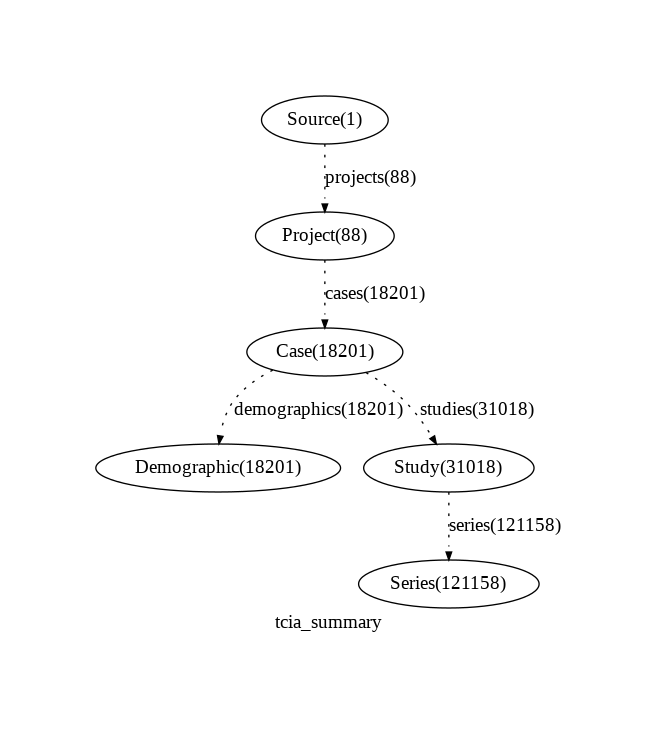

In [2]:
draw_summary(summarize_graph(tcia), 'tcia_summary')


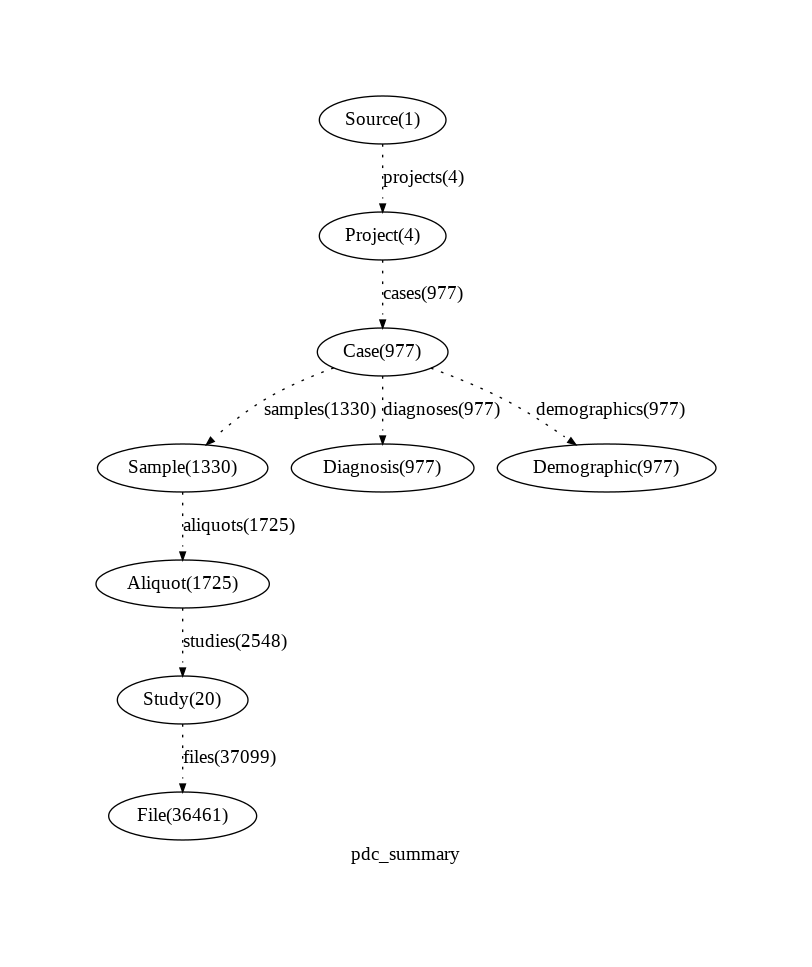

In [3]:
draw_summary(summarize_graph(pdc), 'pdc_summary')


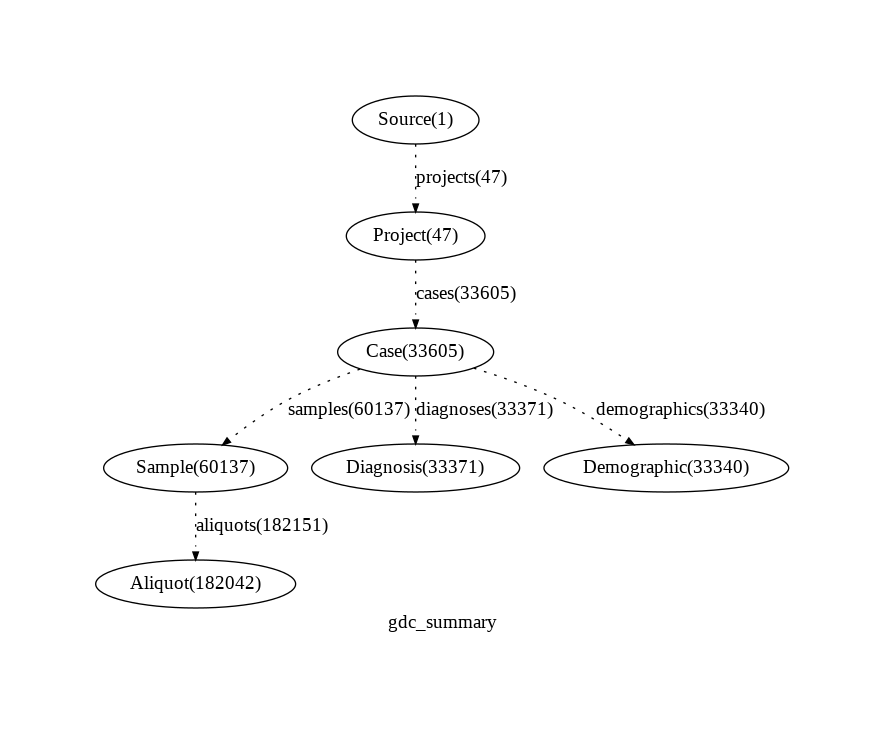

In [4]:
draw_summary(summarize_graph(gdc), 'gdc_summary')

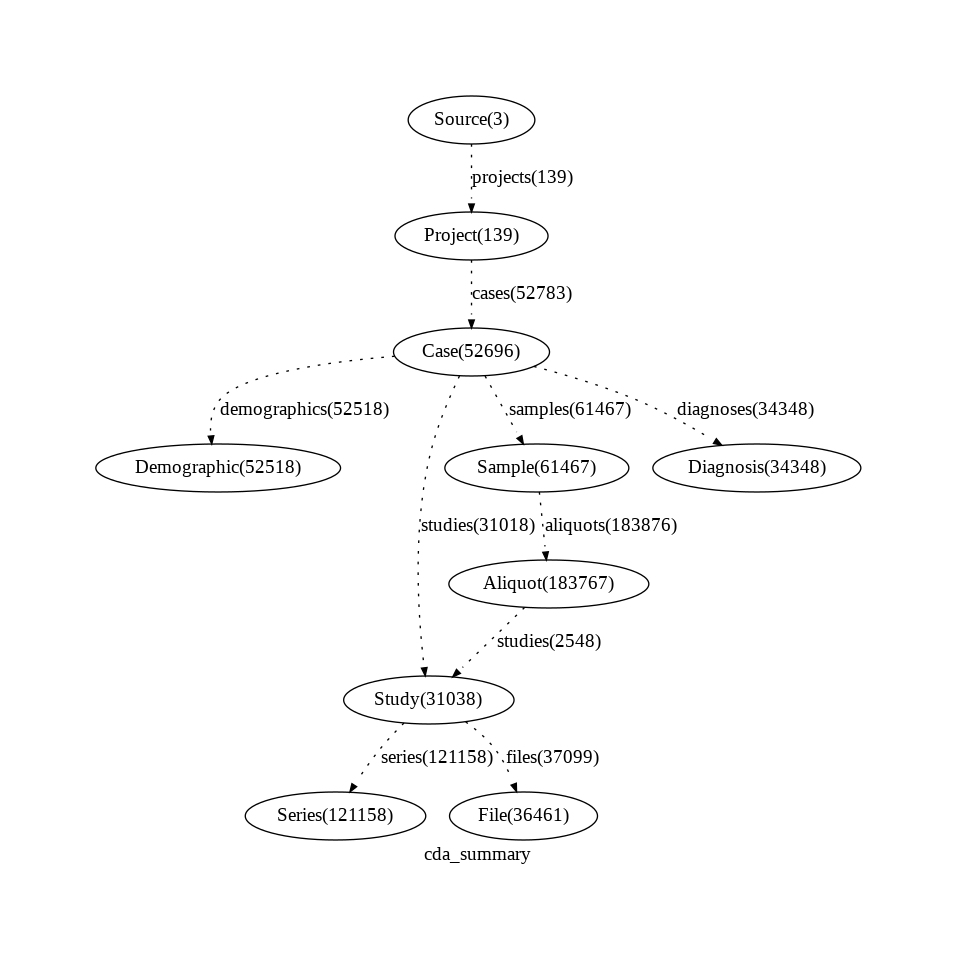

In [5]:
cda = nx.compose(tcia,  nx.compose(pdc, gdc))
draw_summary(summarize_graph(cda), 'cda_summary')


In [ ]:
from transform.gdc.gdc_transformer import make_reader
import json
from attrdict import AttrDict
from transform.pdc.pdc_harvester import load
from transform.tcia.tcia_harvester import load  as tcia_loader


gdc_cases = [ AttrDict(json.loads(c)) for c in make_reader('Case.Vertex')]
pdc_cases = load('allCases')
tcia_cases = [o for o in tcia_loader('patients')]

gdc_submitter_id_map =  {
    c.data.submitter_id: {        
        'gid': c.gid,
        'id': c.gid.replace('Case:','')
    } for c in gdc_cases
}

gdc_id_map =  {
    c.gid.replace('Case:',''): {        
        'gid': c.gid,
        'submitter_id': c.data.submitter_id,
    } for c in gdc_cases
}


pdc_cases = load('allCases')
pdc_case_ids = set([c.gdc_case_id for c in pdc_cases])
pdc_id_map = {    
    c.gdc_case_id: c.case_submitter_id
    for c in pdc_cases
}


tcia_cases = [o for o in tcia_loader('patients')]
tcia_case_ids = set([c.PatientID for c in tcia_cases])

print(
    len(pdc_id_map.keys() & gdc_id_map.keys()),
    len(tcia_case_ids & gdc_submitter_id_map.keys())
)

In [ ]:
pdc_gdc_intersection = pdc_id_map.keys() & gdc_id_map.keys()
tcia_gdc_intersection = tcia_case_ids & gdc_submitter_id_map.keys()
pdc_tcia_gdc_intersection = tcia_case_ids & gdc_submitter_id_map.keys() & pdc_id_map.keys()

print(
    'pdc_gdc_intersection:', len(pdc_gdc_intersection),
    'tcia_gdc_intersection:', len(tcia_gdc_intersection),
    'pdc_tcia_gdc_intersection:', len(pdc_tcia_gdc_intersection)
)

In [8]:
pdc_gdc_intersection = pdc_id_map.keys() & gdc_id_map.keys()
tcia_gdc_intersection = tcia_case_ids & gdc_submitter_id_map.keys()

In [9]:
for k in pdc_gdc_intersection:
    pdc_id = pdc_id_map[k]
    gdc_id = gdc_id_map[k]
    cda.add_edge(gdc_id['gid'], pdc_id, label='same_as')

In [10]:
for k in tcia_gdc_intersection:
    tcia_id = k
    gdc_id = gdc_submitter_id_map[k]
    cda.add_edge(gdc_id['gid'], tcia_id, label='same_as')

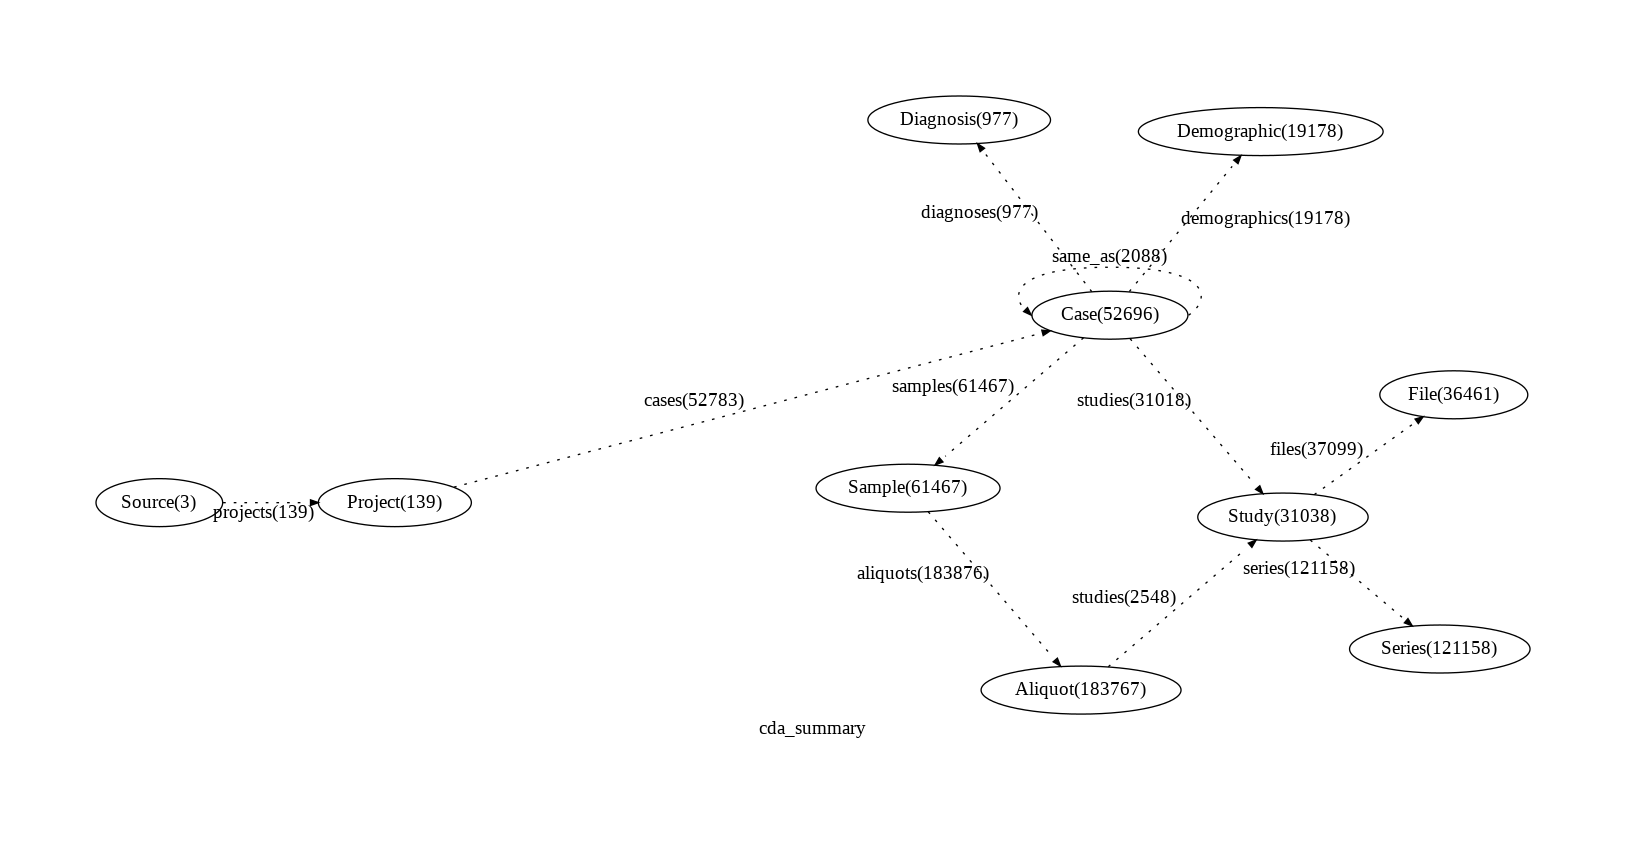

In [11]:
draw_summary(summarize_graph(cda), 'cda_summary', prog='circo')


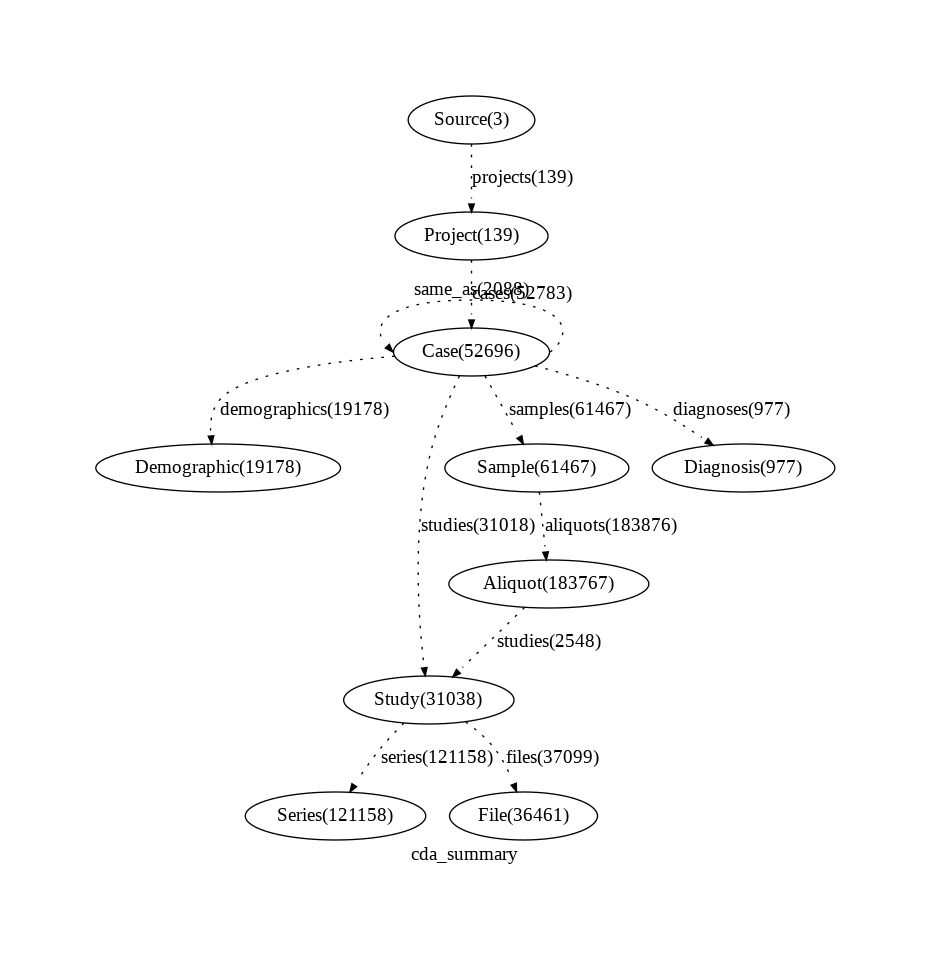

In [12]:
draw_summary(summarize_graph(cda), 'cda_summary', prog='dot')

In [29]:
# diagnoses, demographic
print(gdc_cases[0].data.gdc_attributes.diagnoses[0].diagnosis_id)

1e426165-2d2f-4034-b1b3-a635d27c898d
